In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Win용
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac용
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv('drinks.csv')

In [6]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

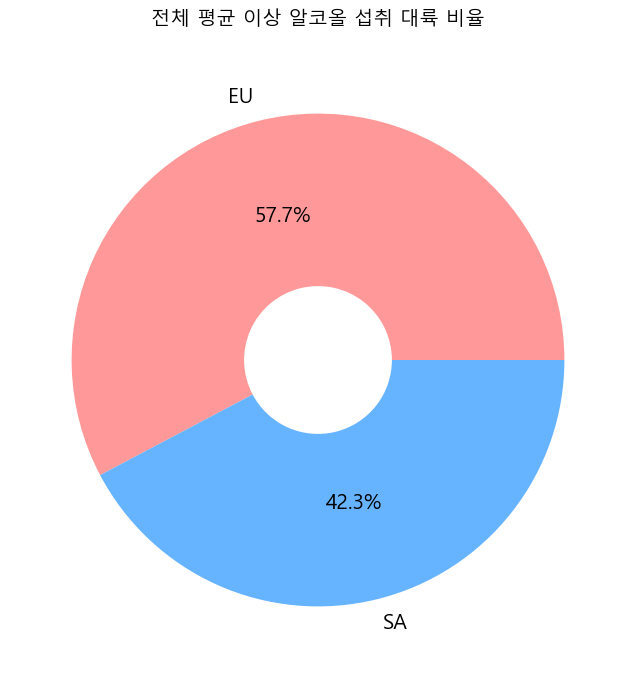

In [14]:
# 전체 평균보다 많은 알코올 도수를 섭취하는 대륙을 가운데가 비워져 있는 원형 그래프로 출력하시오.

# 데이터 읽기
df = pd.read_csv('drinks.csv')

# 전체 평균 알코올 도수 계산
total_mean = df['total_litres_of_pure_alcohol'].mean()

# 대륙별 평균 알코올 도수 계산
continent_mean = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()

# 전체 평균보다 높은 대륙만 필터링
high_alcohol = continent_mean[continent_mean > total_mean]

# 파이 차트 생성
plt.figure(figsize=(10, 8))
plt.pie(high_alcohol, 
        labels=high_alcohol.index,
        autopct='%.1f%%',
        wedgeprops={'width': 0.7},  # 도넛 형태로 만들기
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

plt.title('전체 평균 이상 알코올 섭취 대륙 비율', pad=20, fontsize=14)

plt.show()


C:\Users\KOSMO\AppData\Local\Temp\ipykernel_18240\1303896874.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  autopct=lambda pct: f'{pct:.1f}%\n({continent_mean[int(pct*len(continent_mean)/100)]:.1f}L)',


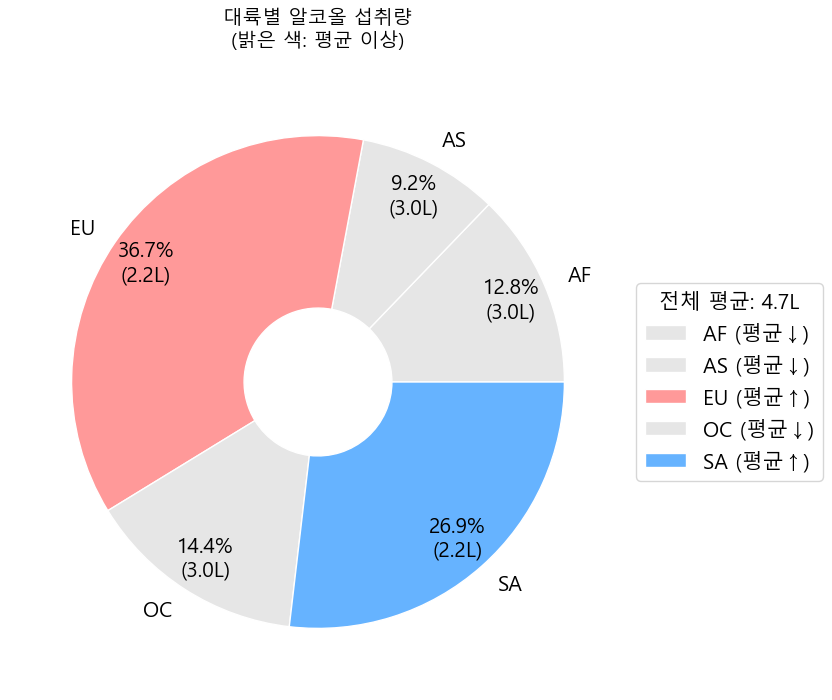

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('drinks.csv')

# 전체 평균 알코올 도수 계산
total_mean = df['total_litres_of_pure_alcohol'].mean()

# 대륙별 평균 알코올 도수 계산
continent_mean = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()

# 파이 차트 생성
plt.figure(figsize=(10, 8))

# 색상 설정
colors = ['#e6e6e6'] * len(continent_mean)  # 기본 색상은 회색으로
highlight_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']  # 하이라이트 색상

# 평균보다 높은 대륙의 색상 변경
high_alcohol_idx = continent_mean[continent_mean > total_mean].index
for i, continent in enumerate(continent_mean.index):
    if continent in high_alcohol_idx:
        colors[i] = highlight_colors[list(high_alcohol_idx).index(continent)]

# 도넛 차트 생성
plt.pie(continent_mean, 
        labels=continent_mean.index,
        colors=colors,
        autopct=lambda pct: f'{pct:.1f}%\n({continent_mean[int(pct*len(continent_mean)/100)]:.1f}L)',
        wedgeprops={'width': 0.7, 'edgecolor': 'white'},
        pctdistance=0.85)

# 제목 설정
plt.title('대륙별 알코올 섭취량\n(밝은 색: 평균 이상)', pad=20, fontsize=14)

# 범례 추가
legend_labels = [f"{cont} ({'평균↑' if cont in high_alcohol_idx else '평균↓'})" 
                for cont in continent_mean.index]
plt.legend(legend_labels, 
          title=f'전체 평균: {total_mean:.1f}L',
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


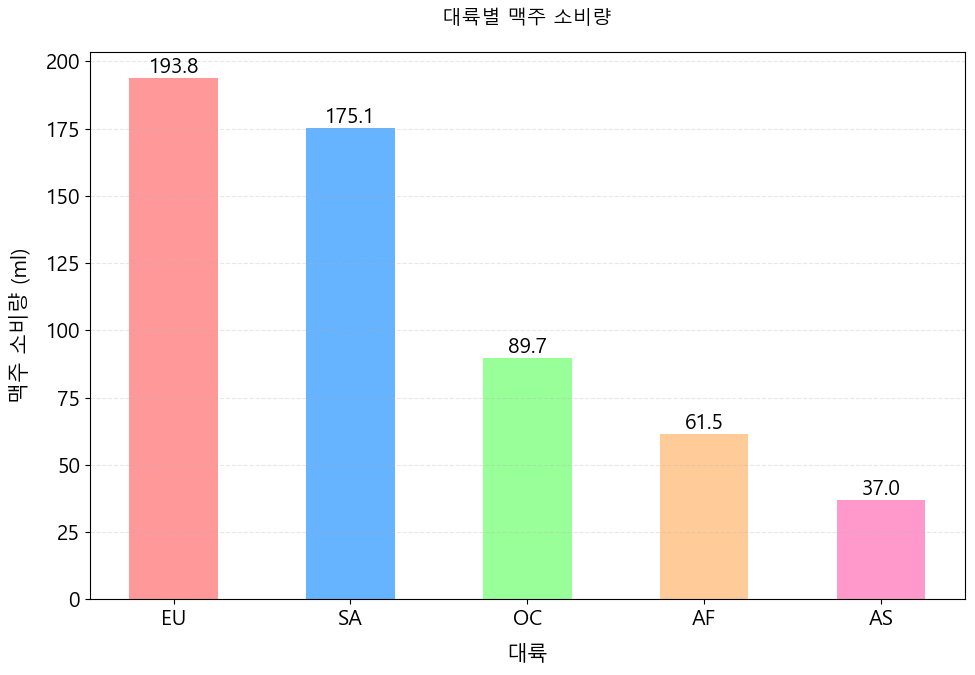

In [22]:
# 대륙별 beer_servings를 높은순으로 출력하시오.

import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('drinks.csv')

# 대륙별 beer_servings 평균 계산 및 정렬
continent_beer = df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)

# 그래프 크기 설정
plt.figure(figsize=(10, 7))

# 막대 그래프 생성
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#99ccff']
bars = plt.bar(continent_beer.index, continent_beer.values, color=colors, width=0.5)

# 그래프 스타일링
plt.title('대륙별 맥주 소비량', pad=20, fontsize=14)
plt.xlabel('대륙', labelpad=10)
plt.ylabel('맥주 소비량 (ml)', labelpad=10)

# 격자 추가
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom')

# 여백 조정
plt.tight_layout()

plt.show()


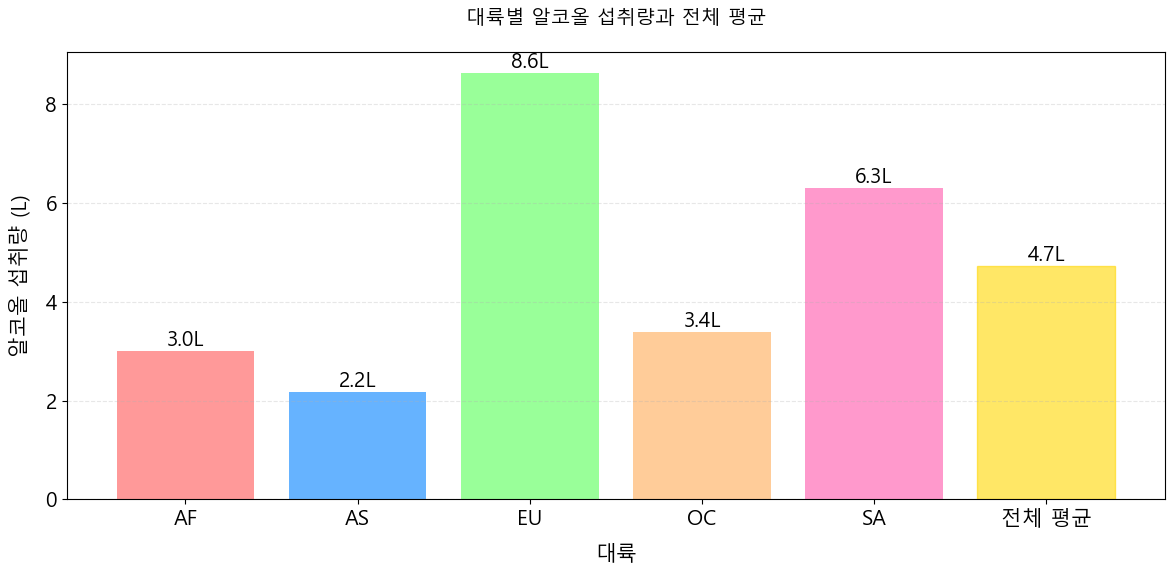

In [ ]:
## 대륙별 total_litres_of_pure_alcohol 막대 그래프로 출력하시오.
## 마지막에는 평균 막대그래프를 출력하시오.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('drinks.csv')

# 대륙별 평균 알코올 섭취량 계산
continent_mean = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
total_mean = df['total_litres_of_pure_alcohol'].mean()

# 전체 평균을 포함한 새로운 Series 생성
all_data = pd.concat([continent_mean, pd.Series({'전체 평균': total_mean})])

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 막대 그래프 생성
bars = plt.bar(range(len(all_data)), all_data.values, 
               color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#99ccff', '#c2c2f0'])

# 그래프 스타일링
plt.title('대륙별 알코올 섭취량과 전체 평균', pad=20, fontsize=14)
plt.xlabel('대륙', labelpad=10)
plt.ylabel('알코올 섭취량 (L)', labelpad=10)

# x축 레이블 설정
plt.xticks(range(len(all_data)), all_data.index)

# 격자 추가
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}L',
             ha='center', va='bottom')

# 전체 평균 막대 강조
bars[-1].set_color('#FFD700')
bars[-1].set_alpha(0.6)

# 여백 조정
plt.tight_layout()

plt.show()
